In [52]:
import sys
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

if ".." not in sys.path:
    sys.path.append("..")

from utils.const import (
    ALL_VARS,
    INTEREST_VARS,
    VARIABLE_COLORS,
    ALL_ZONES,
    GROUPED_DATASETS_PATH,
    SELECTED_ZONES,
    METEOR_VARS,
)
from utils.plotting import (
    plot_series,
    box_plot,
    hist_plot,
    data_exploration,
)
from utils.stats import (
    print_variable_info,
    describe_variables,
    filter_final_data,
)

from utils.preprocessing import (
    mfill,
    date_fill,
)

from utils.transform import (
    yeo_johnson_transformation,
    log_transformation,
)
chosen_zones= ["CENTRO", "SURESTE3", "NORTE2"]

In [53]:
grouped_df: dict[str, pd.DataFrame] = dict()

for zone_path in GROUPED_DATASETS_PATH:
    zone = zone_path.split("/")[-1].split(".")[0].split("_")[0]
    grouped_df.update({zone: pd.read_csv(zone_path, parse_dates=["date"])})

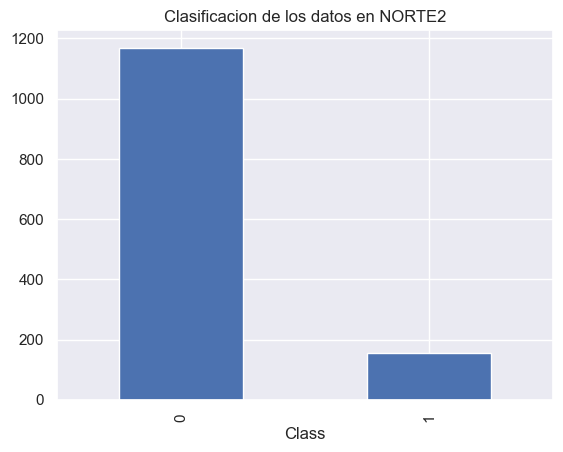

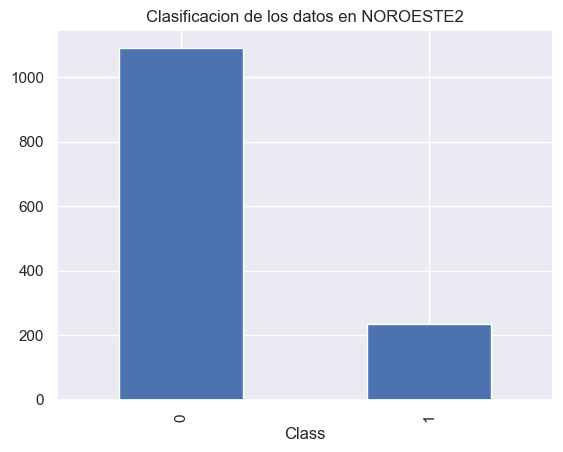

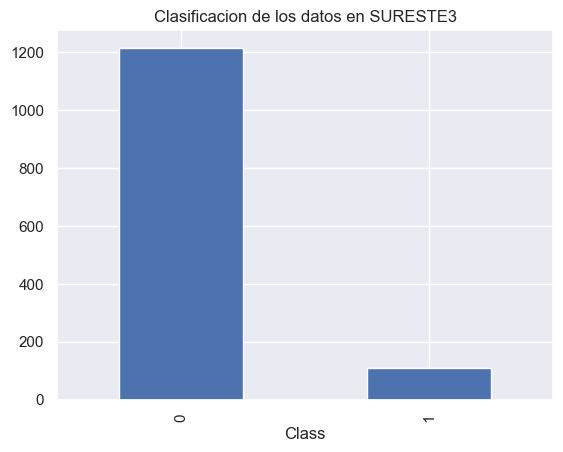

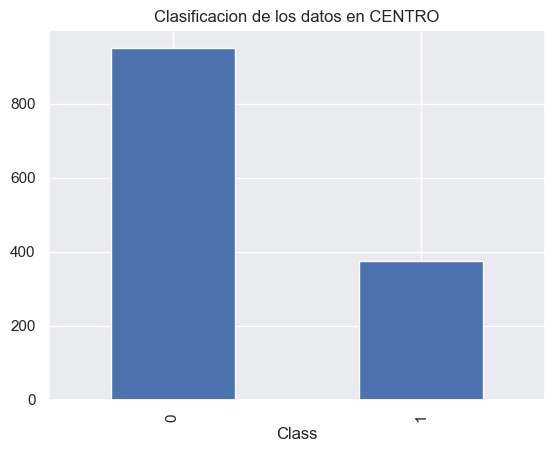

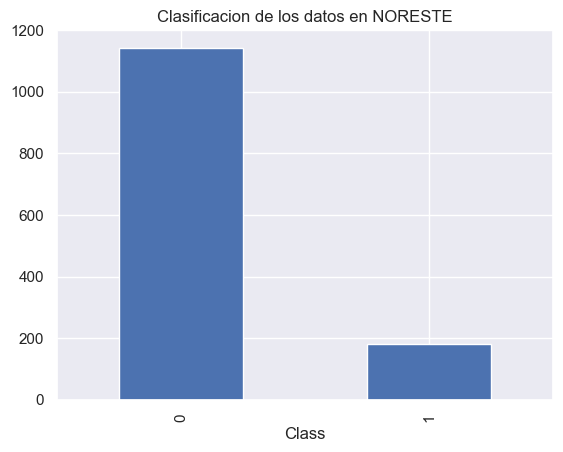

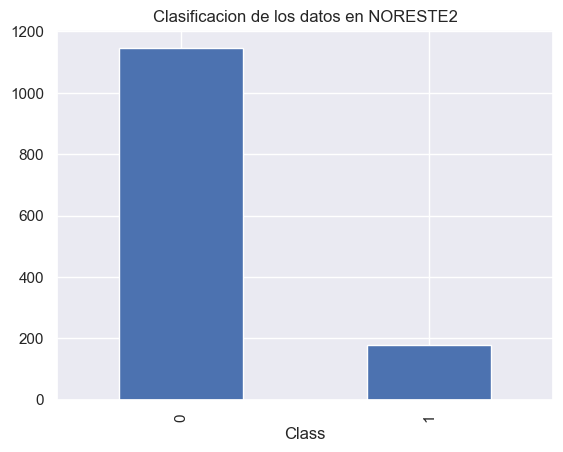

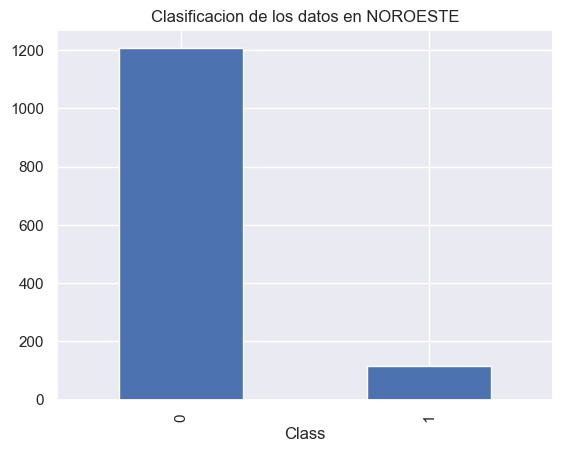

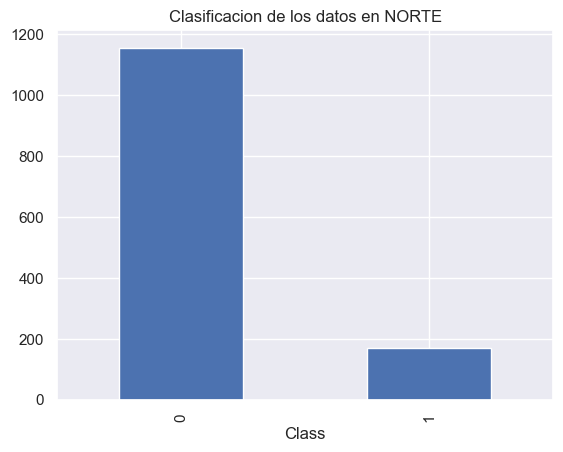

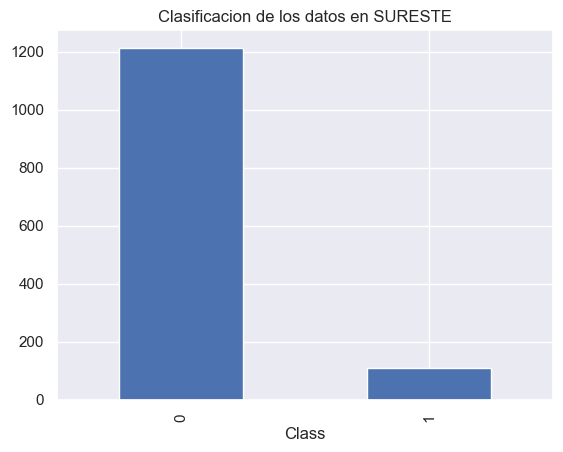

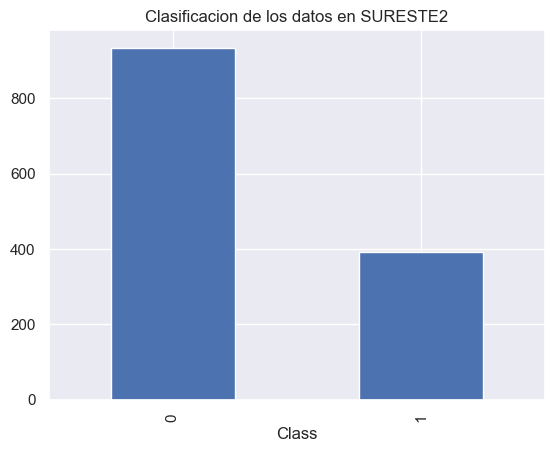

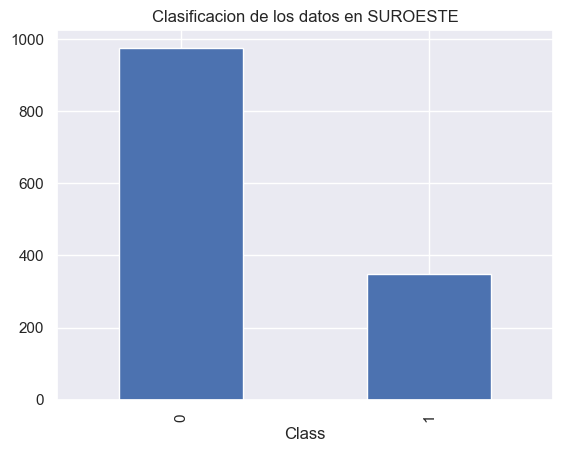

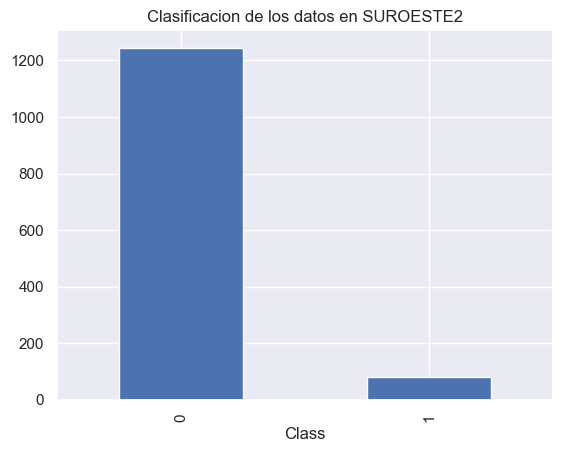

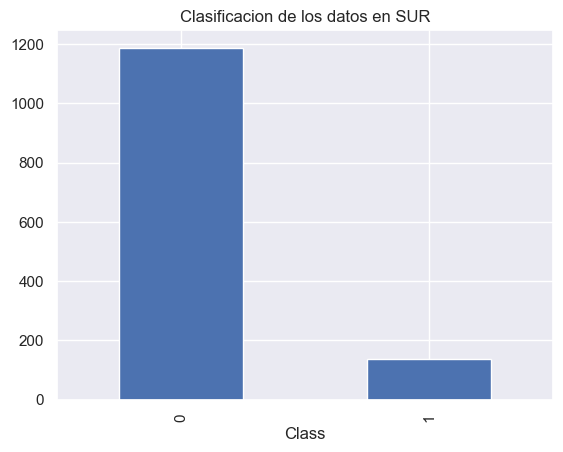

In [54]:
# Clasificar cada dia por si es bueno o malo, (1 o 0) dependiendo de si tiene PM2.5 mayor o igual a 50, esto es malo, y si es menor a 50, esto es bueno

for zone in grouped_df:
    grouped_df[zone]["Class"] = grouped_df[zone]["PM2.5"].apply(
        lambda x: 1 if x >= 30 else 0
    )
for zone in grouped_df:
    grouped_df[zone]["Class"].value_counts().plot(kind="bar")
    plt.title(f"Clasificacion de los datos en {zone}")
    plt.show()
    

In [55]:
for zone, df in grouped_df.items():
    df.to_csv(f"../../datos/06_classification_datasets/{zone}_2020_2023.csv", index=False)

In [56]:
destacionalized_df: dict[str, pd.DataFrame] = dict()
for zone, df in grouped_df.items():
    df_ = df.copy() 

    for column in df_.drop(["date", "Class"], axis=1):
        df_[column] = df_[column].diff()

    destacionalized_df.update({zone: df_.dropna()})

del df_


destacionalized_df["CENTRO"].head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,Class
1,2020-01-02,0.097917,4.295833,2.579167,6.862500,3.541667,-27.562083,-27.562741,-5.845833,0.0,-27.041667,0.202083,0.015375,4.533333,1.295833,11.541667,0
2,2020-01-03,-0.328750,-3.854167,-2.904167,-6.754167,13.625000,0.410833,-1.280417,6.125000,0.0,-26.791667,0.752083,-0.002167,0.361667,6.050000,59.166667,0
3,2020-01-04,0.108333,1.112500,3.254167,4.362500,-7.041667,9.560000,8.104167,8.087500,0.0,3.875000,0.281250,0.006083,-2.570000,-6.133333,-80.708333,0
4,2020-01-05,0.132917,-0.645833,2.479167,1.787500,0.078125,15.338750,11.291667,-1.366667,0.0,0.916667,3.741667,0.002583,1.250833,-0.016667,3.166667,0
5,2020-01-06,0.363333,4.300000,7.150000,11.470833,-0.536458,26.460313,4.690208,-4.033333,0.0,-6.958333,0.744271,0.012500,2.902917,-0.604167,4.833333,1


In [57]:
for zone in grouped_df:
    print(f"Proporción de la zona {zone}:\n{grouped_df[zone]['Class'].value_counts(normalize=True)}")

Proporción de la zona NORTE2:
Class
0    0.882264
1    0.117736
Name: proportion, dtype: float64
Proporción de la zona NOROESTE2:
Class
0    0.823396
1    0.176604
Name: proportion, dtype: float64
Proporción de la zona SURESTE3:
Class
0    0.916981
1    0.083019
Name: proportion, dtype: float64
Proporción de la zona CENTRO:
Class
0    0.717736
1    0.282264
Name: proportion, dtype: float64
Proporción de la zona NORESTE:
Class
0    0.862642
1    0.137358
Name: proportion, dtype: float64
Proporción de la zona NORESTE2:
Class
0    0.86566
1    0.13434
Name: proportion, dtype: float64
Proporción de la zona NOROESTE:
Class
0    0.911698
1    0.088302
Name: proportion, dtype: float64
Proporción de la zona NORTE:
Class
0    0.872453
1    0.127547
Name: proportion, dtype: float64
Proporción de la zona SURESTE:
Class
0    0.916226
1    0.083774
Name: proportion, dtype: float64
Proporción de la zona SURESTE2:
Class
0    0.704906
1    0.295094
Name: proportion, dtype: float64
Proporción de la zon

In [58]:
for zone,df in destacionalized_df.items():
    df.to_csv(f"../../datos/07_classStation_datasets/{zone}_2020_2023.csv", index=False)

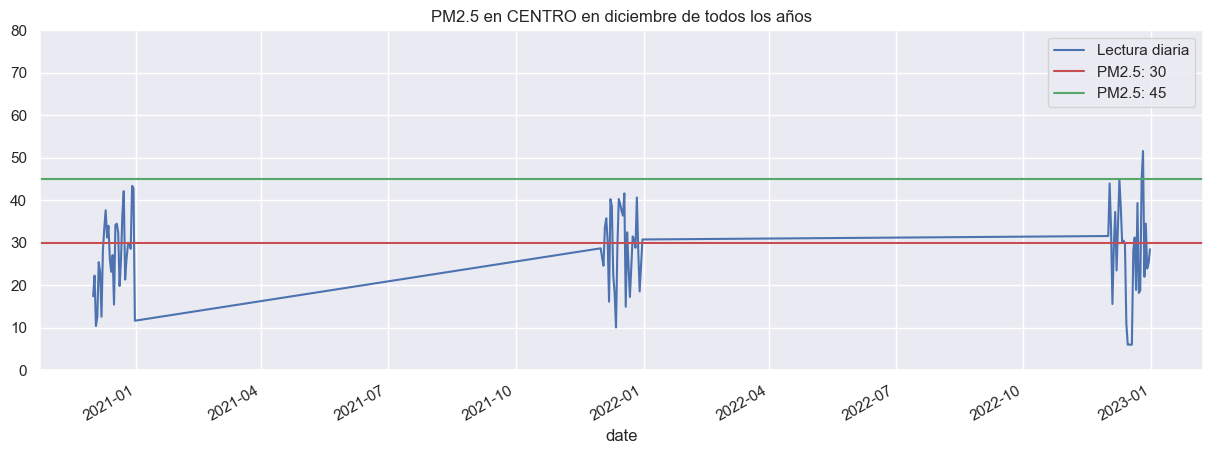

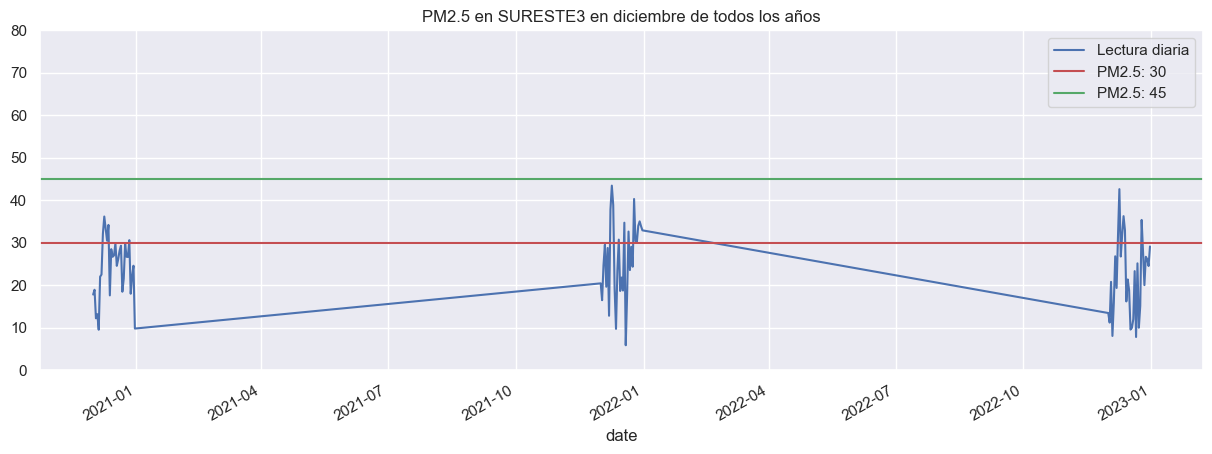

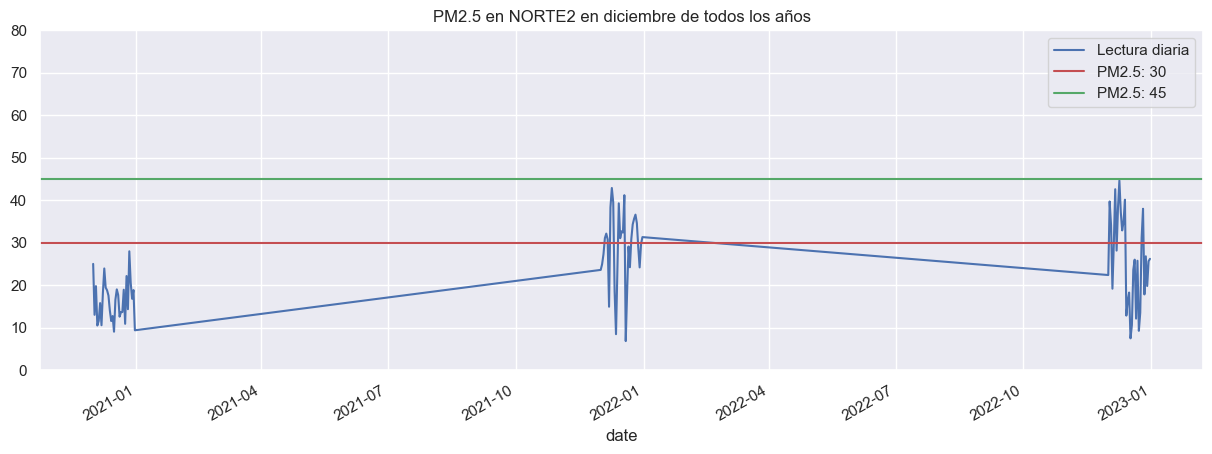

In [59]:
# Hacer serie de tiempo de PM2.5 para las estaciones CENTRO, SURESTE3, y NORTE2, de los dias de diciembre de todos los años, y marcar linea en PM2.5 = 33 y PM2.5 = 45
sns.set_theme(style="darkgrid")
for zone in chosen_zones:
    df = grouped_df[zone].copy()
    df = df[df["date"].dt.month == 12]
    df = df.set_index("date")
    df["PM2.5"].plot(figsize=(15, 5), title=f"PM2.5 en {zone} en diciembre de todos los años")
    plt.axhline(y=30, color="r", linestyle="-")
    plt.axhline(y=45, color="g", linestyle="-")
    plt.legend(["Lectura diaria", "PM2.5: 30", "PM2.5: 45"])
    plt.ylim(0, 80)
    plt.show()

In [60]:
diciembre_df: dict[str, pd.DataFrame] = dict()
for zone,df in grouped_df.items():
    df_ = df.copy()
    df_ = df_[df_["date"].dt.month == 12]
    diciembre_df.update({zone: df_})
del df_

for zone in chosen_zones:
    print(f'Proporcion de dias malos y buenos en la zona {zone}:\n{diciembre_df[zone]["Class"].value_counts(normalize=True)}\n')


Proporcion de dias malos y buenos en la zona CENTRO:
Class
0    0.580645
1    0.419355
Name: proportion, dtype: float64

Proporcion de dias malos y buenos en la zona SURESTE3:
Class
0    0.731183
1    0.268817
Name: proportion, dtype: float64

Proporcion de dias malos y buenos en la zona NORTE2:
Class
0    0.698925
1    0.301075
Name: proportion, dtype: float64



C:\Users\Franco Mendoza\AppData\Local\Temp\ipykernel_2140\2826747685.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day"] = df["date"].dt.day_name()
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True

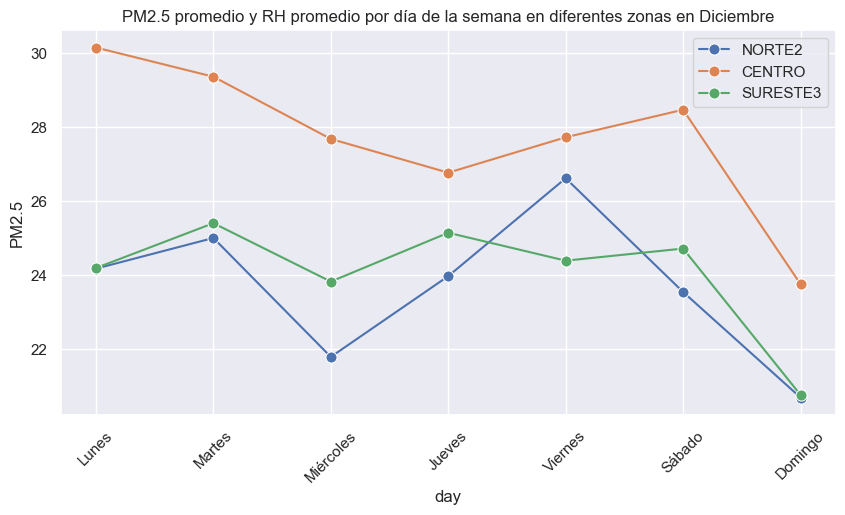

In [67]:
# Graph of average PM2.5 per each day of the week, for each zone.

sns.set_theme(style="darkgrid")
english_to_spanish = {
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miércoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo",
}

spanish_days = [
    "Lunes",
    "Martes",
    "Miércoles",
    "Jueves",
    "Viernes",
    "Sábado",
    "Domingo",
]

plt.figure(figsize=(10, 5))

for zone in SELECTED_ZONES:
    df = diciembre_df[zone]
    df = df[["date", "PM2.5","RH"]]
    df["day"] = df["date"].dt.day_name()
    df = df.groupby("day").mean().reset_index()
    
    df["day"] = df["day"].map(english_to_spanish)
    df["day"] = pd.Categorical(df["day"], categories=spanish_days, ordered=True)
    df = df.sort_values("day")
    
    sns.lineplot(data=df, x="day", y="PM2.5", marker="o", markersize=8, label=zone)  

plt.title("PM2.5 promedio y RH promedio por día de la semana en diferentes zonas en Diciembre")
plt.xticks(rotation=45)  
plt.grid(True) 
plt.legend()
plt.show()

del df

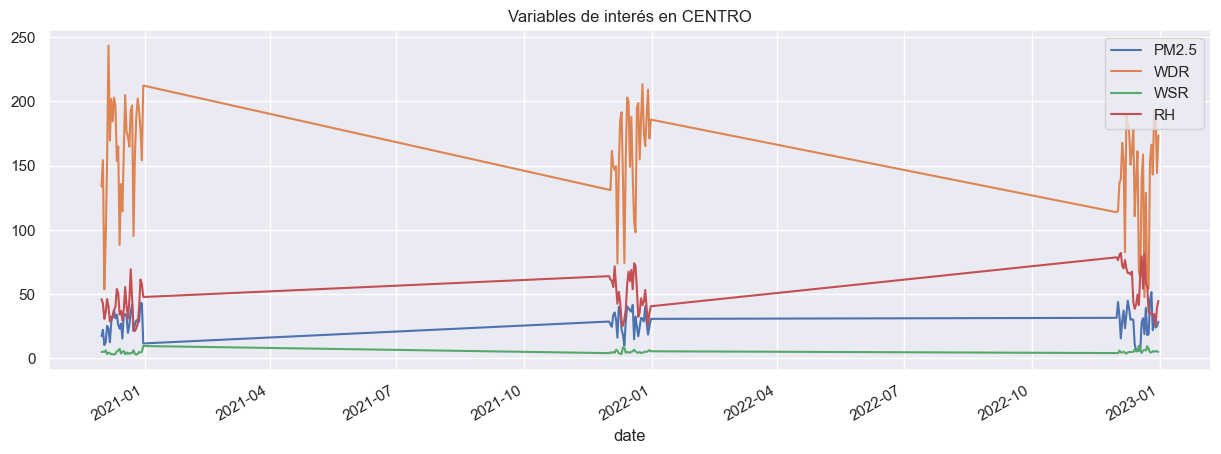

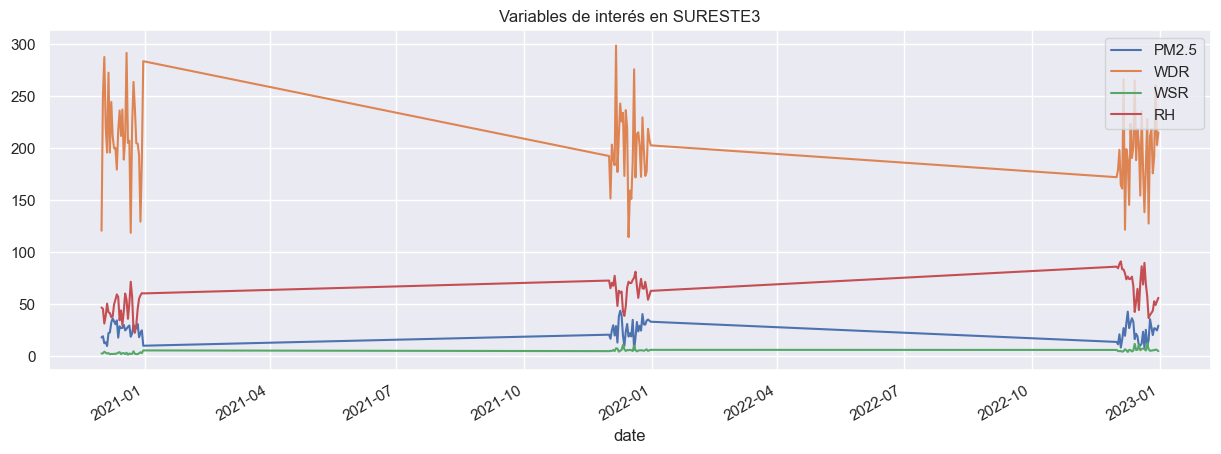

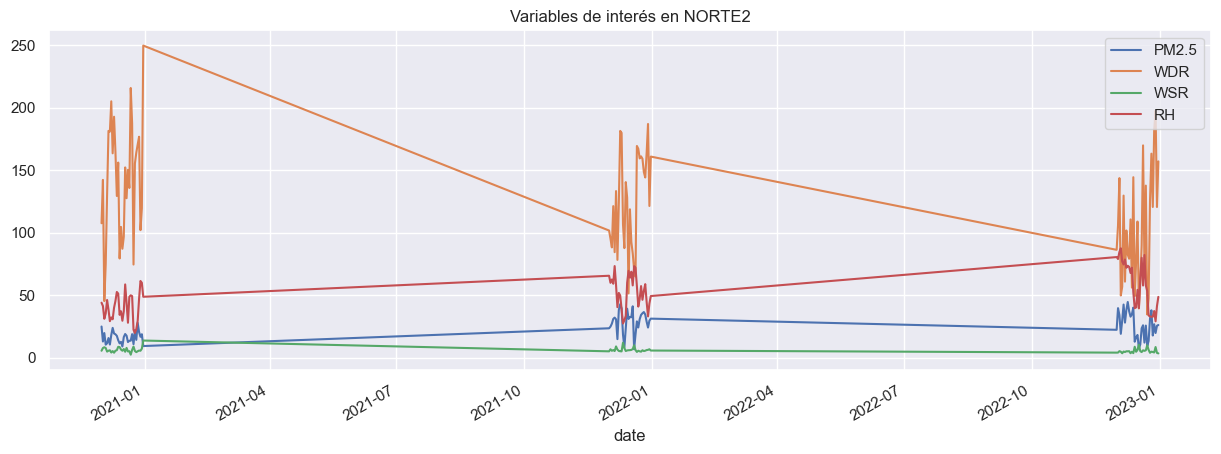

In [62]:
# Hacer una grafica con los datos de INTEREST_VARS como serie de  tiempo, y marcar linea en PM2.5 = 33 y PM2.5 = 45
sns.set_theme(style="darkgrid")
for zone in chosen_zones:
    df = diciembre_df[zone].copy()
    df = df.set_index("date")
    df[METEOR_VARS].plot(figsize=(15, 5), title=f"Variables de interés en {zone}")
    plt.legend(METEOR_VARS)
    plt.show()
del df

In [63]:
# for zone, df in diciembre_df.items():
#     df.to_csv(f"../../datos/08_december_datasets/{zone}_2020_2023.csv", index=False)